# Dependencies

This demo uses three main libs (aside from jupyter notebooks):

- Czml3: a lib made by Juan Luis Cano, to generate Cesium data from Python in CZML format ([more info](https://github.com/poliastro/czml3))
- Telluric: a lib from Satellogic, to work with geospatial data ([docs](https://telluric.readthedocs.io/en/latest/))
- Orbit-predictor: a lib from Satellogic, to work with orbital data ([more info](https://github.com/satellogic/orbit-predictor))

In [1]:
!pip install czml3 telluric orbit-predictor

In [2]:
from orbit_predictor.sources import get_predictor_from_tle_lines
from telluric import GeoVector, GeoFeature, FeatureCollection
from czml3.widget import CZMLWidget
from cesium_helpers import czml_from_feature_collection

In [3]:
cyprus = GeoVector.from_geojson("../satellogic/model_based_planner/mbp/data/countries/Cyprus.geojson")

/home/fisa/venvs/cesium_demo/lib/python3.7/site-packages/telluric/plotting.py:171: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


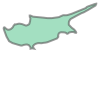

In [4]:
cyprus

In [9]:
features_on_map = FeatureCollection([
    GeoFeature(cyprus, {"color": [0, 200, 50, 100]})
])

In [10]:
czml = czml_from_feature_collection(features_on_map, "Visualization")
CZMLWidget(czml)

CZMLWidget(document=[
    {
        "id": "document",
        "version": "1.0",
        "name": "Visualization"
    },
    {
        "name": "polygon_0",
        "description": "polygon_0",
        "polygon": {
            "positions": {
                "cartographicDegrees": [
                    33.652618,
                    35.354103,
                    0,
                    33.713051,
                    35.381943,
                    0,
                    33.749161,
                    35.397217,
                    0,
                    33.756943,
                    35.399719,
                    0,
                    33.774994,
                    35.402222,
                    0,
                    33.80722,
                    35.400276,
                    0,
                    33.853607,
                    35.403053,
                    0,
                    33.871109,
                    35.406387,
                    0,
                    33.969719,
                    35.436104,
                    0,
                    34.292221,
                    35.566666,
                    0,
                    34.314163,
                    35.575554,
                    0,
                    34.336662,
                    35.589439,
                    0,
                    34.342499,
                    35.599159,
                    0,
                    34.349998,
                    35.606941,
                    0,
                    34.360275,
                    35.611938,
                    0,
                    34.389442,
                    35.623886,
                    0,
                    34.549438,
                    35.680832,
                    0,
                    34.556938,
                    35.683327,
                    0,
                    34.581665,
                    35.688606,
                    0,
                    34.590271,
                    35.690277,
                    0,
                    34.590553,
                    35.686943,
                    0,
                    34.569717,
                    35.643608,
                    0,
                    34.386665,
                    35.535271,
                    0,
                    34.28083,
                    35.476944,
                    0,
                    34.259438,
                    35.467499,
                    0,
                    34.225273,
                    35.455551,
                    0,
                    34.119995,
                    35.400833,
                    0,
                    33.958054,
                    35.312775,
                    0,
                    33.948326,
                    35.30722,
                    0,
                    33.940552,
                    35.299438,
                    0,
                    33.921387,
                    35.272774,
                    0,
                    33.910553,
                    35.253052,
                    0,
                    33.90583,
                    35.242218,
                    0,
                    33.901939,
                    35.215828,
                    0,
                    33.900276,
                    35.198051,
                    0,
                    33.901665,
                    35.164444,
                    0,
                    33.902496,
                    35.161659,
                    0,
                    33.973885,
                    35.088051,
                    0,
                    34.030548,
                    35.046387,
                    0,
                    34.035553,
                    35.041382,
                    0,
                    34.054443,
                    35.020554,
                    0,
                    34.067215,
                    35.003883,
                    0,
                    34.077217,
                    34.989998,
                    0,
                    34.079163,
                    34.986938,
        